In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Dense,Flatten
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
train_data , train_target = [] , []
train_folder_path='trainingSet/trainingSet/'

In [3]:
for i in range(10):
    file_list=os.listdir(train_folder_path+f'{i}')
    for file in file_list:
        img=cv2.imread(f'{train_folder_path}{i}/{file}',cv2.IMREAD_GRAYSCALE)
        train_data.append(img)
        train_target.append(i)
x_train=np.array(train_data)
y_train=np.array(train_target)

In [4]:
(x_train.shape , y_train.shape)

((42000, 28, 28), (42000,))

In [5]:
test_data , test_target = [] , []
test_folder_path='testSet/'

In [6]:
for i in range(10):
    file_list=os.listdir(test_folder_path+f'{i}')
    for file in file_list:
        img=cv2.imread(f'{test_folder_path}{i}/{file}',cv2.IMREAD_GRAYSCALE)
        test_data.append(img)
        test_target.append(i)
x_test=np.array(test_data)
y_test=np.array(test_target)

In [7]:
(x_test.shape , y_test.shape)

((27880, 28, 28), (27880,))

0

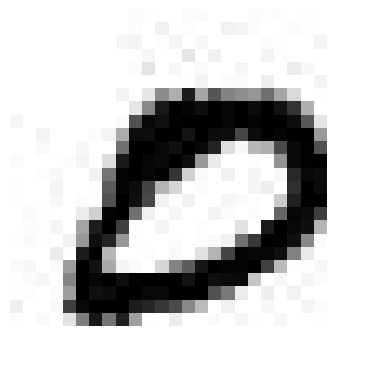

In [8]:
plt.imshow(x_train[5],cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
y_train[5]

In [9]:
shuffle_index=np.random.permutation(42000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]

In [10]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print('Training Samples Dimenstion',x_trainr.shape)
print('Testing Samples Dimenstion',x_testr.shape)

Training Samples Dimenstion (42000, 28, 28, 1)
Testing Samples Dimenstion (27880, 28, 28, 1)


In [11]:
model=Sequential()

In [12]:
#First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#Fully Connected Layer
model.add(Dense(32))
model.add(Activation('relu'))

#Fully Connected Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [15]:
results=model.fit(x_trainr,y_train, epochs=15, validation_split=0.3)

Epoch 1/15
919/919 [==============================] - 35s 37ms/step - loss: 0.5352 - accuracy: 0.8412 - val_loss: 0.1695 - val_accuracy: 0.9497
Epoch 2/15
919/919 [==============================] - 30s 33ms/step - loss: 0.1245 - accuracy: 0.9613 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 3/15
919/919 [==============================] - 30s 33ms/step - loss: 0.0906 - accuracy: 0.9719 - val_loss: 0.1099 - val_accuracy: 0.9668
Epoch 4/15
919/919 [==============================] - 30s 33ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.0823 - val_accuracy: 0.9767
Epoch 5/15
919/919 [==============================] - 31s 33ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0953 - val_accuracy: 0.9726
Epoch 6/15
919/919 [==============================] - 30s 33ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.1245 - val_accuracy: 0.9659
Epoch 7/15
919/919 [==============================] - 30s 32ms/step - loss: 0.0469 - accuracy: 0.9848 - val_loss: 0.0813 - val_accuracy:

In [16]:
print(results.history)

{'loss': [0.5352439284324646, 0.12454662472009659, 0.09055481106042862, 0.07396378368139267, 0.05951719731092453, 0.05671078339219093, 0.04686456918716431, 0.04425235837697983, 0.037588153034448624, 0.036012373864650726, 0.0332304984331131, 0.028959691524505615, 0.026368752121925354, 0.031527671962976456, 0.01867532730102539], 'accuracy': [0.8412190675735474, 0.9612911939620972, 0.9719038009643555, 0.9772101044654846, 0.9814619421958923, 0.9824143648147583, 0.9847953915596008, 0.985883891582489, 0.9887410998344421, 0.9887410998344421, 0.9894894361495972, 0.9906119108200073, 0.9915643334388733, 0.9898295998573303, 0.9941154718399048], 'val_loss': [0.16947591304779053, 0.1332349330186844, 0.10987358540296555, 0.0822521522641182, 0.09528177976608276, 0.12451094388961792, 0.0812821239233017, 0.11749394237995148, 0.10230043530464172, 0.10810723900794983, 0.10242403298616409, 0.0844988003373146, 0.12896008789539337, 0.10372588038444519, 0.1323951929807663], 'val_accuracy': [0.949686527252197

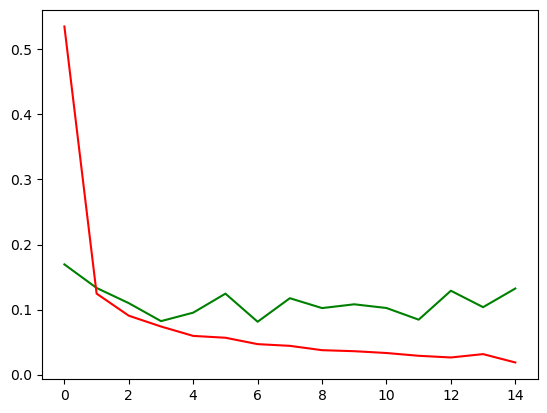

In [27]:
results.history.keys()
plt.plot(range(len(results.history['val_loss'])),results.history['val_loss'],color='green')
plt.plot(range(len(results.history['loss'])),results.history['loss'],color='red')
plt.show()


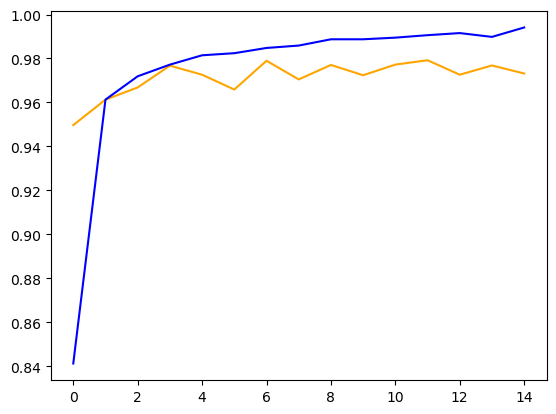

In [29]:
results.history.keys()
plt.plot(range(len(results.history['val_accuracy'])),results.history['val_accuracy'],color='orange')
plt.plot(range(len(results.history['accuracy'])),results.history['accuracy'],color='blue')
plt.show()

In [39]:
plot=pd.DataFrame()
plot['Validation Accuracy']=results.history['val_accuracy']
plot['Training Accuracy']=results.history['accuracy']
plot['Validation Loss']=results.history['val_loss']
plot['Training Loss']=results.history['loss']
plot['Epoch']=plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.949687,0.841219,0.169476,0.535244,1
1,0.961273,0.961291,0.133235,0.124547,2
2,0.966828,0.971904,0.109874,0.090555,3
3,0.976748,0.977210,0.082252,0.073964,4
4,0.972621,0.981462,0.095282,0.059517,5
5,0.965876,0.982414,0.124511,0.056711,6
6,0.978970,0.984795,0.081282,0.046865,7
7,0.970479,0.985884,0.117494,0.044252,8
8,0.977065,0.988741,0.102300,0.037588,9
9,0.972383,0.988741,0.108107,0.036012,10


In [33]:
test_loss, test_acc=model.evaluate(x_testr, y_test)
print('Test loss on 28000 test samles',test_loss)
print('Validation Accuracy on 28000 samles',test_acc)

872/872 [==============================] - 13s 15ms/step - loss: 0.2123 - accuracy: 0.9654
Test loss on 28000 test samles 0.21231380105018616
Validation Accuracy on 28000 samles 0.9653515219688416


In [65]:
predictions=model.predict([x_testr])

872/872 [==============================] - 13s 15ms/step


In [66]:
predictions

array([[9.9999797e-01, 7.8280915e-10, 9.6774961e-09, ..., 5.8355226e-07,
        2.3606483e-11, 1.3059320e-06],
       [9.9987888e-01, 2.5377792e-10, 2.4258119e-08, ..., 1.1159710e-04,
        5.0706750e-10, 3.0732799e-06],
       [9.9999988e-01, 3.2091239e-12, 1.2468713e-09, ..., 7.0083161e-08,
        5.7378500e-13, 1.4277336e-08],
       ...,
       [1.6488389e-07, 5.7187725e-07, 1.2578361e-09, ..., 3.6288038e-05,
        2.8584526e-07, 9.9996042e-01],
       [2.0550678e-10, 2.6292253e-09, 6.0113490e-12, ..., 1.8607736e-06,
        1.3142585e-09, 9.9999797e-01],
       [3.4508238e-09, 3.0235415e-11, 4.3458851e-11, ..., 1.5529990e-06,
        2.7865456e-06, 9.9999297e-01]], dtype=float32)

In [67]:
pred=np.argmax(predictions,axis=1)

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [68]:
pred.shape

(27880,)

In [70]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix)

[[2705    1   22    3    1   15   12    6   13    3]
 [   1 3083   61    9   18    6    6  119    4   15]
 [   3    0 2742   29    1    3    0   22    2    2]
 [   0    0   20 2734    1   21    0    9    1    1]
 [   5    2   13    1 2649    4   12    4    8   63]
 [   0    0    2   33    2 2396    6    4    2    3]
 [   2    3    2    1    5   28 2686    0    8    1]
 [   0    2   64    9    3    1    0 2685    3    7]
 [   1    0   27   27    4   37    8    6 2646   11]
 [   3    1    1   27    7   36    0   23   14 2588]]


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.figure(figsize=(12,8))
    plt.title('Precision and recall vs decision threshold')
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recal")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

1


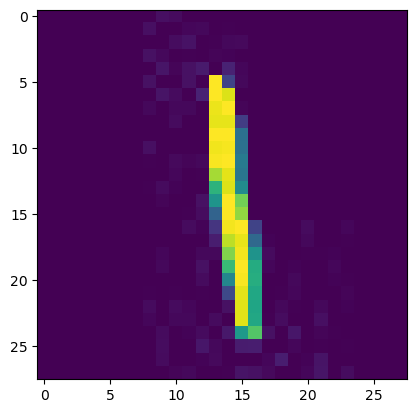

In [43]:
print(np.argmax(predictions[5100]))
plt.imshow(x_test[5100])